In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
br=pd.read_csv('Brazil_Covid.csv')
br

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
br.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [4]:
ab=br.isnull().sum()
col=br.columns

In [5]:
count=0
for i in range(len(ab)):
    if(ab[i]>4000):
       count+=1
print(count)

105


It seems most of the data that is in 111 columns 105 columns are such that they have null values more than 50% and 
basically it is of no use to predict suchh data as all the values would be on assumptions.

still we will try to fill in the null values by using mean function

In [6]:
br.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=br.columns
for i in range(len(br.dtypes)):
    if(br.dtypes[i]=="object"):
        br[col[i]]=le.fit_transform(br[col[i]].astype(str))

In [8]:
br.dtypes

Patient ID                                                 int32
Patient age quantile                                       int64
SARS-Cov-2 exam result                                     int32
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [9]:
br.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [10]:
df=br.isnull().sum()
col=br.columns
for i in range(len(df)):
    if(df[i]>0):
        br[col[i]]=br[col[i]].fillna(br[col[i]].mean())

In [11]:
br.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
                                                        ..
HCO3 (arterial blood gas analysis)                       0
pO2 (arterial blood gas analysis)                        0
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
Length: 111, dtype: int64

In [12]:
br.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

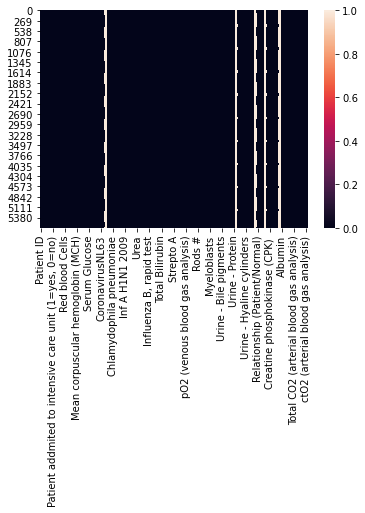

In [13]:
sns.heatmap(br.isnull())

In [14]:
br.describe()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,...,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,2821.500000,9.318391,0.098866,0.013997,0.008859,0.007264,-2.187398e-09,-1.598342e-08,-3.820600e-10,7.373957e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,1629.426791,5.777903,0.298509,0.117489,0.093713,0.084929,3.268915e-01,3.268915e-01,3.266203e-01,3.258055e-01,...,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,6.917145e-02,5.953330e-02,5.953330e-02,6.917145e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,1410.750000,4.000000,0.000000,0.000000,0.000000,0.000000,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
50%,2821.500000,9.000000,0.000000,0.000000,0.000000,0.000000,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
75%,4232.250000,14.000000,0.000000,0.000000,0.000000,0.000000,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
max,5643.000000,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [15]:
br.corr()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,1.000000,-0.014136,-0.018664,3.747586e-03,-0.004803,0.000162,-0.020071,-0.014706,0.006948,0.008635,...,-0.011604,0.011653,-0.002840,-0.010472,0.005338,0.004317,-0.005510,0.021115,5.294190e-03,-0.003037
Patient age quantile,-0.014136,1.000000,0.075244,4.616576e-02,0.015736,-0.035772,0.031292,0.019498,-0.051183,0.038392,...,-0.016286,-0.034110,0.041484,0.041507,0.006264,0.012090,-0.007157,-0.021239,-4.135060e-02,-0.004455
SARS-Cov-2 exam result,-0.018664,0.075244,1.000000,1.424375e-01,0.019364,0.027586,0.037396,0.039530,-0.106482,0.040622,...,0.015189,-0.037511,0.015111,0.036451,-0.028879,-0.024761,0.036186,-0.030815,-5.314858e-03,0.030967
"Patient addmited to regular ward (1=yes, 0=no)",0.003748,0.046166,0.142437,1.000000e+00,-0.011264,-0.010192,-0.071569,-0.075363,-0.150186,-0.010687,...,0.051133,-0.058510,0.008632,0.052540,-0.041230,-0.034427,0.027247,-0.040326,-2.249795e-17,0.070462
"Patient addmited to semi-intensive unit (1=yes, 0=no)",-0.004803,0.015736,0.019364,-1.126431e-02,1.000000,-0.008087,-0.161800,-0.157295,0.006185,-0.020840,...,-0.199293,0.040333,-0.080640,-0.063793,-0.040144,-0.048656,-0.120723,-0.025106,5.392442e-02,-0.017481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),0.004317,0.012090,-0.024761,-3.442683e-02,-0.048656,0.130018,-0.067014,-0.087151,0.025061,0.055542,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.082657,-1.375525e-01,-0.434762
pO2 (arterial blood gas analysis),-0.005510,-0.007157,0.036186,2.724735e-02,-0.120723,0.049237,0.024449,0.016877,-0.025850,-0.047159,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.181270,-1.016304e-01,0.270951
Arteiral Fio2,0.021115,-0.021239,-0.030815,-4.032553e-02,-0.025106,0.105651,0.012284,-0.000655,0.081845,0.013618,...,-0.017055,0.381415,-0.227696,-0.376063,0.134155,0.082657,-0.181270,1.000000,1.259335e-01,-0.196606
Phosphor,0.005294,-0.041351,-0.005315,-2.249795e-17,0.053924,0.039437,0.036852,0.057834,0.049969,-0.041703,...,-0.193765,0.365646,-0.488217,-0.459113,-0.076610,-0.137552,-0.101630,0.125933,1.000000e+00,0.219942


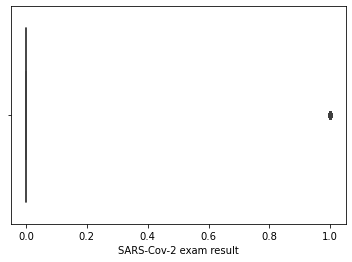

In [16]:
sns.boxplot(br['SARS-Cov-2 exam result'])

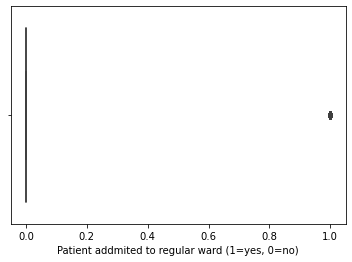

In [17]:
sns.boxplot(br['Patient addmited to regular ward (1=yes, 0=no)'])

In [18]:
bv=br.copy()

In [19]:
bv.skew()

Patient ID                                                0.000000
Patient age quantile                                      0.034623
SARS-Cov-2 exam result                                    2.688541
Patient addmited to regular ward (1=yes, 0=no)            8.276088
Patient addmited to semi-intensive unit (1=yes, 0=no)    10.485579
                                                           ...    
HCO3 (arterial blood gas analysis)                       -8.579301
pO2 (arterial blood gas analysis)                        13.283447
Arteiral Fio2                                            19.110216
Phosphor                                                 20.802559
ctO2 (arterial blood gas analysis)                      -12.064655
Length: 111, dtype: float64

In [20]:
ab=bv.skew()
col=br.columns
for i in range(len(ab)):
    if(ab[i]>0.5):
        br[col[i]]=np.log1p(br[col[i]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


from scipy.stats import zscore
z=np.abs(zscore(bv))
bl=bv[(z>3).all(axis=1)]

The zscore has some error because of invalid data.

In [26]:
x=bv.drop(['SARS-Cov-2 exam result'], axis=1)
y=bv['SARS-Cov-2 exam result']

In [22]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)
x

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


array([[-7.57081752e-01,  6.37244135e-01, -1.19146410e-01, ...,
        -2.24705166e-18, -4.37838024e-19, -4.49778963e-18],
       [-1.45493498e+00,  1.32959813e+00, -1.19146410e-01, ...,
        -2.24705166e-18, -4.37838024e-19, -4.49778963e-18],
       [ 5.20167641e-01, -2.28198355e-01, -1.19146410e-01, ...,
        -2.24705166e-18, -4.37838024e-19, -4.49778963e-18],
       ...,
       [-4.27488805e-01, -9.20552346e-01, -1.19146410e-01, ...,
        -2.24705166e-18, -4.37838024e-19, -4.49778963e-18],
       [ 9.17274973e-01,  1.17978641e-01, -1.19146410e-01, ...,
        -2.24705166e-18, -4.37838024e-19, -4.49778963e-18],
       [-1.16830573e+00,  1.67577512e+00, -1.19146410e-01, ...,
        -2.24705166e-18, -4.37838024e-19, -4.49778963e-18]])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
max_scr=0
np.where(x.values >= np.finfo(np.float64).max)
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state, test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_rstate=r_state
        
print('Final rstate corresponding to',final_rstate, 'max accuracy score is', max_scr)

<ipython-input-30-e25d8f32249b>:5: RuntimeWarning: invalid value encountered in greater_equal
  np.where(x.values >= np.finfo(np.float64).max)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
br.dtypes

Patient ID                                                 int32
Patient age quantile                                       int64
SARS-Cov-2 exam result                                   float64
Patient addmited to regular ward (1=yes, 0=no)           float64
Patient addmited to semi-intensive unit (1=yes, 0=no)    float64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [32]:
for i in range(len(br.dtypes)):
    if(br.dtypes[i]=="object"):
        print('true')
        
    else:
        print('false')

false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false
false


There are no str values still it is showing Nan.

In [33]:
x

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,1588,13,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
1,451,17,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
2,3669,8,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
3,5457,5,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
4,4843,15,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3892,3,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
5640,1860,17,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
5641,2125,4,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
5642,4316,10,0,0,0,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,...,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09


The data is not correct in itlself, tried everything still issues, infact this data cant be used because of 98% null values.